In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [50]:
ha=pd.read_csv('heart.csv',index_col=0)

In [51]:
ha.head()

,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,,,,,,,,,,,,,
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [53]:
#feature selection
x=ha.drop('output',axis=1)

In [54]:
y=ha['output']

In [55]:
from sklearn.ensemble import ExtraTreesRegressor
et=ExtraTreesRegressor()

In [58]:
et.fit(x,y)

ExtraTreesRegressor()

In [59]:
et.feature_importances_

array([0.03348092, 0.19344361, 0.05717087, 0.05785479, 0.01538454,
       0.0426178 , 0.07748138, 0.09905241, 0.07773805, 0.06502988,
       0.15214209, 0.12860366])

In [60]:
f=pd.Series(et.feature_importances_,index=x.columns)

<AxesSubplot:>

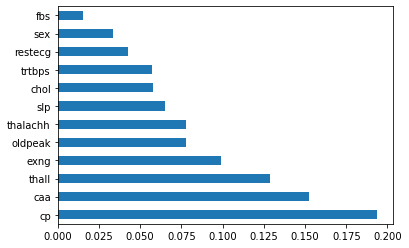

In [78]:
f.nlargest(13).plot(kind='barh')

In [63]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [64]:
x_train.head()

,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
age,,,,,,,,,,,,
65,0,2,155,269,0,1,148,0,0.8,2,0,2
54,1,0,140,239,0,1,160,0,1.2,2,0,2
59,1,0,164,176,1,0,90,0,1.0,1,2,1
58,1,1,125,220,0,1,144,0,0.4,1,4,3
46,1,0,140,311,0,1,120,1,1.8,1,2,3


In [65]:
#standard scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [66]:
x1=sc.fit_transform(x_train)
x2=sc.fit_transform(x_test)

In [67]:
#model building
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [69]:
log.fit(x1,y_train)
pred=log.predict(x2)

In [71]:
#accuracy check
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.8131868131868132

In [75]:
from sklearn.metrics import classification_report
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.71      0.85      0.77        34
           1       0.90      0.79      0.84        57

    accuracy                           0.81        91
   macro avg       0.80      0.82      0.81        91
weighted avg       0.83      0.81      0.82        91



In [77]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(pred,y_test))

[[29  5]
 [12 45]]
